In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('pumpkin.csv')
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
data.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [9]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
data = data.drop([c for c in data.columns if c not in new_columns], axis=1)
data.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


In [15]:
avg_price = (data['Low Price'] + data['High Price']) / 2
data['Avg Price'] = avg_price

month = pd.DatetimeIndex(data['Date']).month
print(month)


Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)


In [17]:
data['Month'] = month
data['Price'] = avg_price
data.head()

,Package,Date,Low Price,High Price,Avg Price,Month,Price
0,24 inch bins,4/29/17,270.0,280.0,275.0,4,275.0
1,24 inch bins,5/6/17,270.0,280.0,275.0,5,275.0
2,24 inch bins,9/24/16,160.0,160.0,160.0,9,160.0
3,24 inch bins,9/24/16,160.0,160.0,160.0,9,160.0
4,24 inch bins,11/5/16,90.0,100.0,95.0,11,95.0


In [20]:
import matplotlib.pyplot as plt


In [21]:
data.to_csv('pumpkin_data.csv')

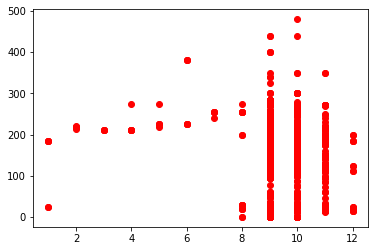

In [19]:
plt.scatter(data['Month'], data['Price'], color='red')

Text(0, 0.5, 'Pumpkin Price')

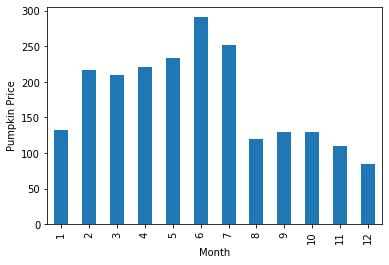

In [23]:
data.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")